In [1]:
import itertools

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
# from scipy.stats import norm
# from scipy.optimize import curve_fit

import pandas as pd

# from sklearn.cluster import KMeans
# from sklearn.preprocessing import OrdinalEncoder

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
source = pd.read_csv("../data/source.csv")
source.head()

,Circuit,Weather Station,Wind Sustained,Gust Sustained,Thresholds (Sustained/ Gust),FPI Value,Reasons for De‐Energization,month,days,year,Wind Threshold,Gust Threshold,Wind Trigger Percentage,Gust Trigger Percentage,Combined Trigger Percentage,start day,end day,start,end
0,BOOTLEGGER,SCE Antelope Valley Fwy,16.0,41.0,31/46,13.98,"Exceeded Threshold, Exceeded FPI,",Sept,5-11,2020,31.0,46.0,51.612903,89.130435,89.130435,5,11,2020-09-05,2020-09-11
1,RED BOX,Chilao (CHOC1),16.0,46.0,31/46,14.01,"Exceeded Threshold, Exceeded FPI,",Sept,5-11,2020,31.0,46.0,51.612903,100.000000,100.000000,5,11,2020-09-05,2020-09-11
2,ENERGY,SCE Santa Susana Pass Rd,16.9,43.8,31/46,13.04,"High Wind Trend, Exceeded FPI,",Nov,29,2020,31.0,46.0,54.516129,95.217391,95.217391,29,29,2020-11-29,2020-11-29
3,SAND CANYON,SCE Magic Mtn Truck Trail,30.6,40.3,31/46,12.11,"High Wind Trend, Exceeded FPI,",Nov,29,2020,31.0,46.0,98.709677,87.608696,98.709677,29,29,2020-11-29,2020-11-29
4,DUKE,SCE Mount Davis,26.9,40.6,30/46,13.04,"High Wind Trend, Exceeded FPI,",Nov,29,2020,30.0,46.0,89.666667,88.260870,89.666667,29,29,2020-11-29,2020-11-29


In [5]:
source.std()

Wind Sustained                  6.645239
Gust Sustained                  6.682699
FPI Value                       0.682807
year                            0.450618
Wind Threshold                  1.716200
Gust Threshold                  2.349300
Wind Trigger Percentage        21.114536
Gust Trigger Percentage        13.845865
Combined Trigger Percentage    14.144443
start day                       9.151308
end day                         5.823607
dtype: float64

In [6]:
wr = pd.read_csv("../data/weather/weather_report_DecJan.csv", parse_dates=["Date"])
wr = wr[~wr.duplicated()]

In [7]:
wr["Hour"] = pd.Timedelta('1h') * wr["Hour"]/100

In [8]:
wr["Time"] = wr["Date"] + wr["Hour"]

<AxesSubplot:>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


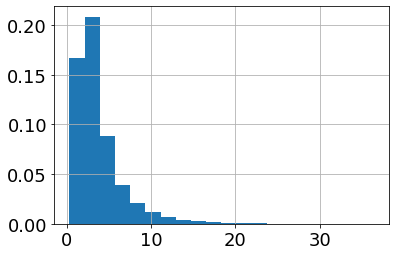

In [9]:
wind_speed = wr["HlyWindSpd (MPH)"]
wind_speed = wind_speed[wind_speed < 100]
wind_speed.hist(density=True, stacked=True, bins=20)

In [10]:
len(source.index)

524

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


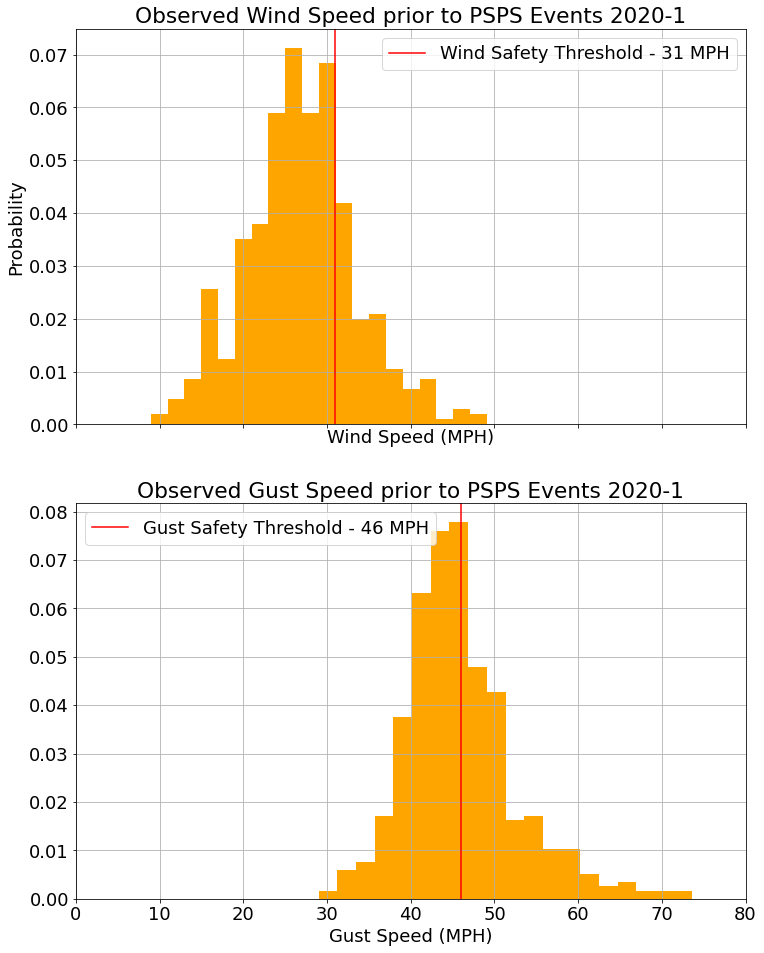

In [11]:
fig, ax = plt.subplots(2,1, figsize = (12,16), sharex=True)

# PSPS Data
ax[0].hist(source["Wind Sustained"].values, density=True, stacked=True, bins=20, color='orange')
ax[0].axvline(31, color='r', label="Wind Safety Threshold - 31 MPH")
# ax[0].text(source[c].mean(), .05, r'$\mu={},\ \sigma={}$'.format(source[c].mean().round(2), source[c].std().round(2)))

ax[0].set_title("Observed Wind Speed prior to PSPS Events 2020-1")
ax[0].set_xlabel("Wind Speed (MPH)")
# ax[0].set_xbound(0,50)
ax[0].set_ylabel("Probability")
ax[0].legend(loc = "upper right")

ax[0].grid(True)

# PSPS Data
ax[1].hist(source["Gust Sustained"].values, density=True, stacked=True, bins=20, color='orange')
ax[1].axvline(46, color='r', label="Gust Safety Threshold - 46 MPH")
# ax[0].text(source[c].mean(), .05, r'$\mu={},\ \sigma={}$'.format(source[c].mean().round(2), source[c].std().round(2)))

ax[1].set_title("Observed Gust Speed prior to PSPS Events 2020-1")
ax[1].set_xlabel("Gust Speed (MPH)")
ax[1].set_xbound(0,80)
# ax[1].set_ylabel("Probability")
ax[1].legend(loc = "upper left")

ax[1].grid(True)

plt.savefig("../images/psps_wind_gust.png")

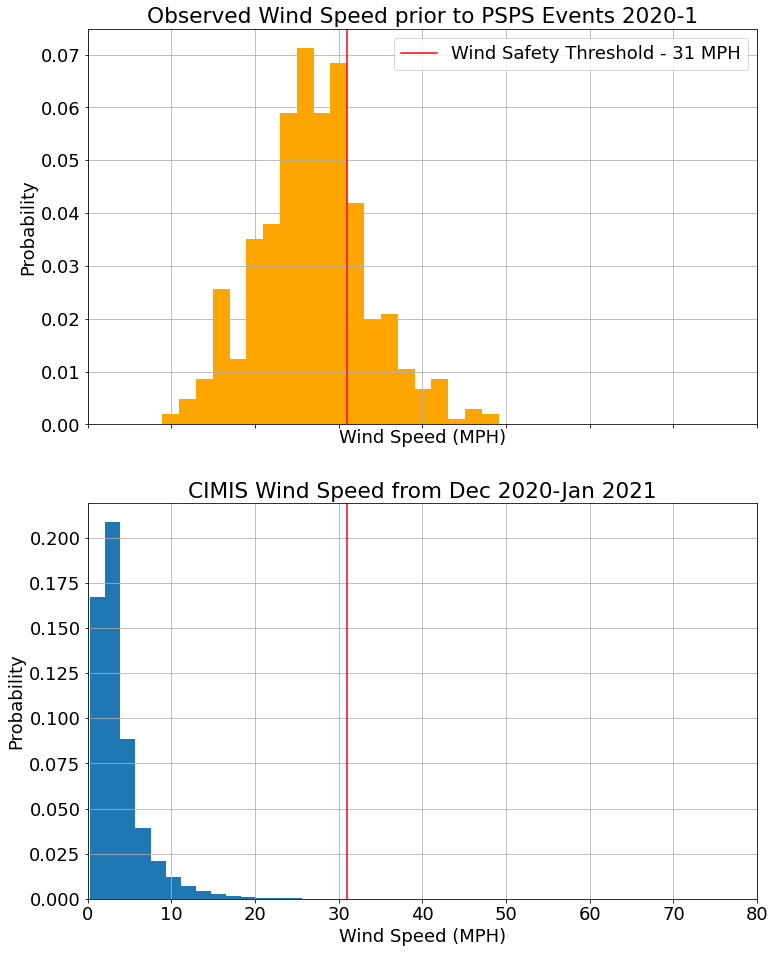

In [12]:
fig, ax = plt.subplots(2,1, figsize = (12,16), sharex=True)
c = "Wind Sustained"

# PSPS Data
ax[0].hist(source[c].values, density=True, stacked=True, bins=20, color='orange')
ax[0].axvline(31, color='r', label="Wind Safety Threshold - 31 MPH")
# ax[0].text(source[c].mean(), .05, r'$\mu={},\ \sigma={}$'.format(source[c].mean().round(2), source[c].std().round(2)))

ax[0].set_title("Observed Wind Speed prior to PSPS Events 2020-1")
ax[0].set_xlabel("Wind Speed (MPH)")
# ax[0].set_xbound(0,80)
ax[0].set_ylabel("Probability")
ax[0].legend(loc = "upper right")

ax[0].grid(True)

# CIMIS Data
ax[1].hist(wind_speed, density=True, stacked=True, bins=20)
ax[1].axvline(31, color='r', label="Wind Safety Threshold")
# ax[1].text(wind_speed.mean(), .2, r'$\mu={},\ \sigma={}$'.format(wind_speed.mean().round(2), wind_speed.std().round(2)))

ax[1].set_title("CIMIS Wind Speed from Dec 2020-Jan 2021")
ax[1].set_xlabel("Wind Speed (MPH)")
ax[1].set_xbound(0,80)
ax[1].set_ylabel("Probability")

ax[1].grid(True)
plt.savefig("../images/psps_cimis_wind.png")

In [14]:
c_map = {
    "Exceeded Threshold, Exceeded FPI,": 0,
    "High Wind Trend, Exceeded FPI,": 1,
    "Exceeded Threshold, 1% Historical, High Wind Trend, Exceeded FPI,": 2,
    "Exceeded Threshold, High Wind Trend, Exceeded FPI,":2
}

colors = source["Reasons for De‐Energization"].apply(lambda r: c_map[r])

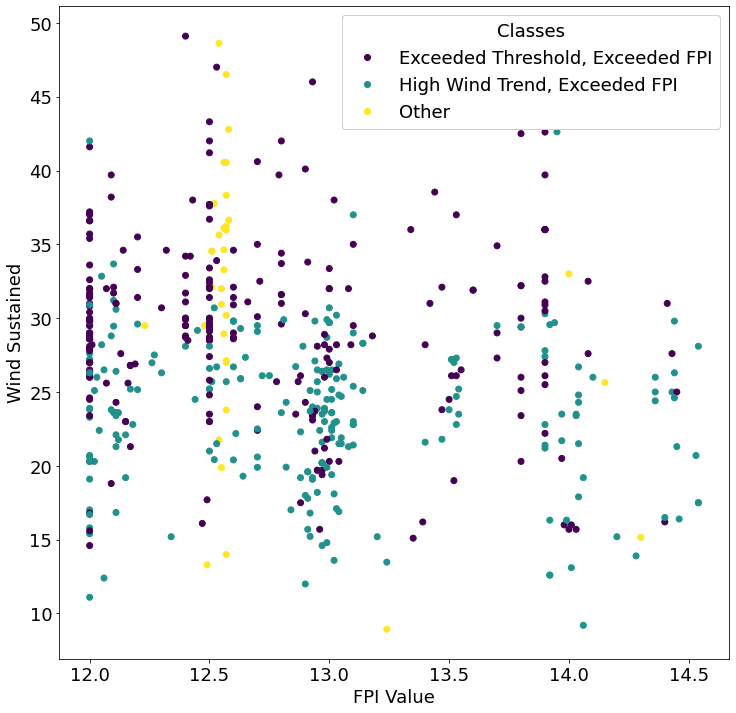

In [15]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

features = ["FPI Value", "Wind Sustained"]
data = source[features].values
scatter = ax.scatter(data[:,0], data[:,1], c=colors.values)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])

handles, _ = scatter.legend_elements()
legend1 = ax.legend(handles, ["Exceeded Threshold, Exceeded FPI", "High Wind Trend, Exceeded FPI", "Other"], loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.savefig("../images/fpi_wind_reasons.png")
plt.show()

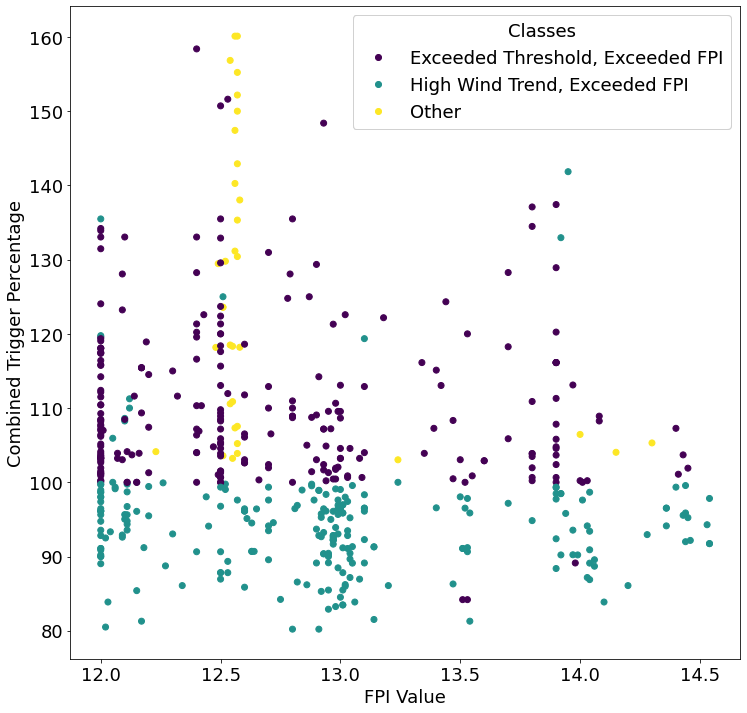

In [16]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

features = ["FPI Value", "Combined Trigger Percentage"]
data = source[features].values
scatter = ax.scatter(data[:,0], data[:,1], c=colors.values)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])

handles, _ = scatter.legend_elements()
legend1 = ax.legend(handles, ["Exceeded Threshold, Exceeded FPI", "High Wind Trend, Exceeded FPI", "Other"], loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.savefig("../images/fpi_percent_reasons.png")
plt.show()